In [11]:
# GP_3_4 (Solution to Exercise 3.4)
# Author: Matthew Dixon
# Version: 1.0 (24.7.2019)
# License: MIT
# Email: matthew.dixon@iit.edu
# Notes: tested on Mac OS X with Python 3.6
# Citation: Please cite the following reference if this notebook is used for research purposes:
# Bilokon P., Dixon M.F. and I. Halperin, Machine Learning in Finance: From Theory to Practice, Springer Graduate textbook Series, 2020. 
# This specific notebook is based on adaptations courtesy of Shengnan Li

This notebook provides a solution to Exercise 3.4 on using GPs to price derivatives.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import *
from BlackScholes import *
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import ConstantKernel, RBF


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
r = 0.001  # risk-free rate   
S= 100      # Underlying spot
KC = 130    # Call strike
KP = 70     # Put strike
sigma = 0.1 # implied volatility  
T = 1.0     # Time to maturity   

In [3]:
# define the call and put prices using the BS model
call = lambda x: bsformula(1, lb+(ub-lb)*x, KC, r, T, sigma, 0)[0]
put = lambda x: bsformula(-1, lb+(ub-lb)*x, KP, r, T, sigma, 0)[0]

# GP Call pricer

In [4]:
lb = 0.001           # lower bound on domain
ub = 300             # upper bound on domain
training_number = 10  # Number of training samples
testing_number = 100 # Number of testing samples

train_x_1 = np.array(np.linspace(0,200, training_number), dtype='float32').reshape(training_number, 1)
train_y_1 = []
for S in train_x_1:
    train_y_1.append(call(S))
    
test_x_1 = np.array(np.linspace(0,200, testing_number), dtype='float32').reshape(testing_number, 1)
test_y_1 = []
for S in test_x_1:
    test_y_1.append(call(S))

sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 1000.0))  #100000.0
gp = gaussian_process.GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=20)
gp.fit(train_x_1,train_y_1)

y_pred_1, sigma_1 = gp.predict(test_x_1, return_std=True)

/Users/matthewdixon/scratch/DL/MarketVectors/venv_tf_old/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-7030.58376694]), 'nit': 5, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Users/matthewdixon/scratch/DL/MarketVectors/venv_tf_old/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-9337.95304871]), 'nit': 5, 'funcalls': 47}
  " state: %s" % convergence_dict)


In [5]:
training_number = 50  # Number of training samples

train_x_2 = np.array(np.linspace(0,200, training_number), dtype='float32').reshape(training_number, 1)
train_y_2 = []
for S in train_x_2:
    train_y_2.append(call(S))

sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 1000.0))  #100000.0
gp = gaussian_process.GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=20)    
gp.fit(train_x_2,train_y_2)

y_pred_2, sigma_2 = gp.predict(test_x_1, return_std=True)

/Users/matthewdixon/scratch/DL/MarketVectors/venv_tf_old/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-7732810.4375]), 'nit': 5, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Users/matthewdixon/scratch/DL/MarketVectors/venv_tf_old/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [6]:
training_number = 100  # Number of training samples

train_x_3 = np.array(np.linspace(0,200, training_number), dtype='float32').reshape(training_number, 1)
train_y_3 = []
for S in train_x_3:
    train_y_3.append(call(S))

sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 1000.0))  #100000.0
gp = gaussian_process.GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=20)
gp.fit(train_x_3,train_y_3)

y_pred_3, sigma_3 = gp.predict(test_x_1, return_std=True)

/Users/matthewdixon/scratch/DL/MarketVectors/venv_tf_old/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-13972071.9140625]), 'nit': 5, 'funcalls': 57}
  " state: %s" % convergence_dict)


In [7]:
training_number = 200  # Number of training samples

train_x_4 = np.array(np.linspace(0,200, training_number), dtype='float32').reshape(training_number, 1)
train_y_4 = []
for S in train_x_4:
    train_y_4.append(call(S))

sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 1000.0))  #100000.0
gp = gaussian_process.GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=20)
gp.fit(train_x_4,train_y_4)

y_pred_4, sigma_4 = gp.predict(test_x_1, return_std=True)

/Users/matthewdixon/scratch/DL/MarketVectors/venv_tf_old/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 25419660.36914062]), 'nit': 7, 'funcalls': 78}
  " state: %s" % convergence_dict)


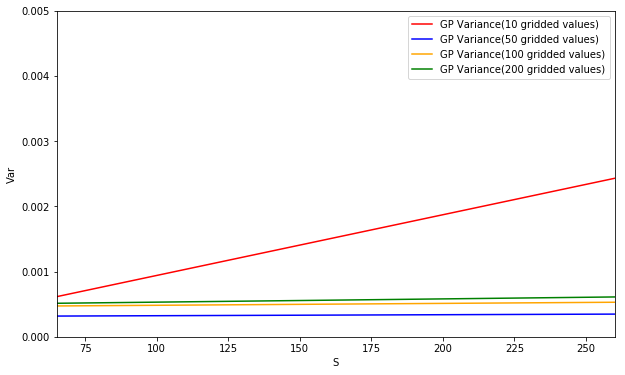

In [8]:
# predictive distribution variance plot with var band 
plt.figure(figsize = (10, 6), facecolor='white', edgecolor='black')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), sigma_1, color = 'red', label = 'GP Variance(10 gridded values)')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), sigma_2, color = 'blue', label = 'GP Variance(50 gridded values)')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), sigma_3, color = 'orange', label = 'GP Variance(100 gridded values)')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), sigma_4, color = 'green', label = 'GP Variance(200 gridded values)')
plt.legend(loc = 'best', prop={'size':10})
plt.xlim([KC/2.0,2.0*KC])
plt.ylim([0,0.005])
plt.xlabel('S')
plt.ylabel('Var')

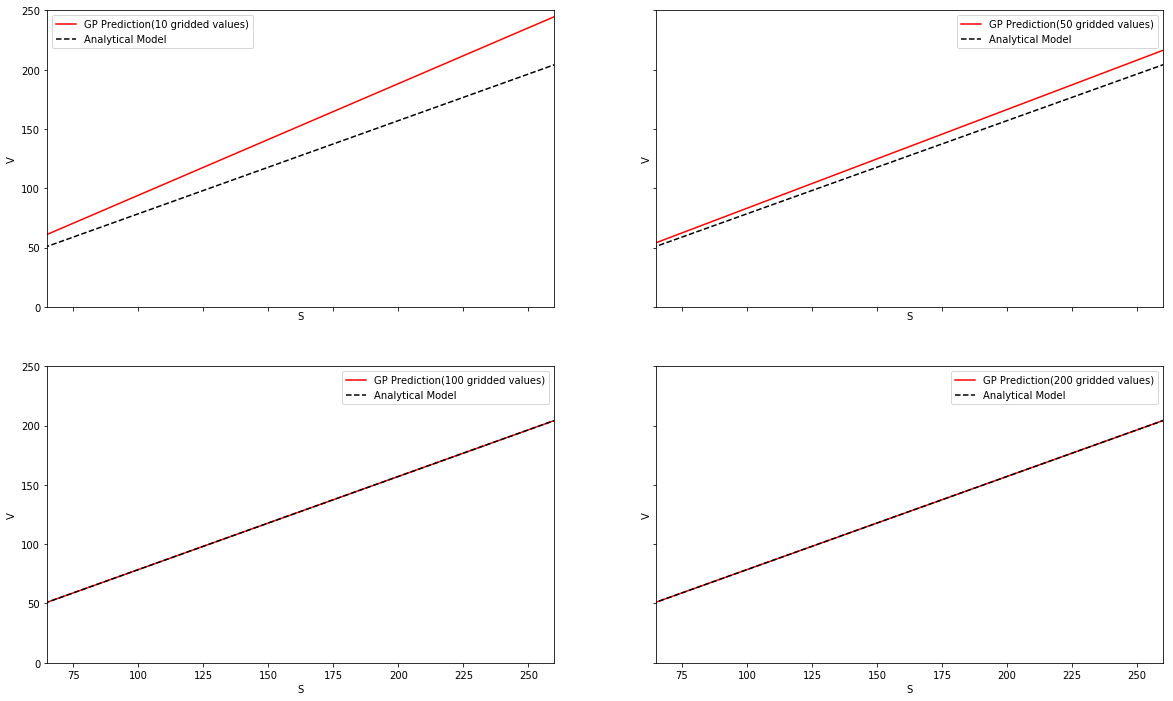

In [9]:
fig, ax = plt.subplots(figsize = (20,12), nrows=2, ncols=2, sharex=True, sharey=True)
ax[0, 0].plot(lb+(ub-lb)*test_x_1.flatten(), y_pred_1, color = 'red', label = 'GP Prediction(10 gridded values)')
ax[0, 0].plot(lb+(ub-lb)*test_x_1.flatten(), test_y_1, color = 'black', label = 'Analytical Model',linestyle="--")
ax[0,0].set_xlim([KC/2.0,2.0*KC])
ax[0,0].set_ylim([0,250])
ax[0,0].set_ylabel('V')
ax[0,0].set_xlabel('S')
ax[0,0].legend()
ax[0, 1].plot(lb+(ub-lb)*test_x_1.flatten(), y_pred_2, color = 'red', label = 'GP Prediction(50 gridded values)')
ax[0, 1].plot(lb+(ub-lb)*test_x_1.flatten(), test_y_1, color = 'black', label = 'Analytical Model',linestyle="--")
ax[0,1].set_ylabel('V')
ax[0,1].set_xlabel('S')
ax[0,1].legend()
ax[1, 0].plot(lb+(ub-lb)*test_x_1.flatten(), y_pred_3, color = 'red', label = 'GP Prediction(100 gridded values)')
ax[1, 0].plot(lb+(ub-lb)*test_x_1.flatten(), test_y_1, color = 'black', label = 'Analytical Model',linestyle="--")
ax[1,0].set_ylabel('V')
ax[1,0].set_xlabel('S')
ax[1,0].legend()
ax[1, 1].plot(lb+(ub-lb)*test_x_1.flatten(), y_pred_4, color = 'red', label = 'GP Prediction(200 gridded values)')
ax[1, 1].plot(lb+(ub-lb)*test_x_1.flatten(), test_y_1, color = 'black', label = 'Analytical Model',linestyle="--")
ax[1,1].set_ylabel('V')
ax[1,1].set_xlabel('S')
ax[1,1].legend()
plt.show()